<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Cats_vs_Dogs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [18]:
! pip install -q kaggle

In [19]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamkr930","key":"2dded94e826e0c96a181e0086fa02526"}'}

In [20]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:12<00:00, 133MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.9MB/s]


In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 104ms/step - loss: 1.0741 - accuracy: 0.6100 - val_loss: 0.6146 - val_accuracy: 0.6654
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5839 - accuracy: 0.7092 - val_loss: 0.5299 - val_accuracy: 0.7380
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4862 - accuracy: 0.7677 - val_loss: 0.4678 - val_accuracy: 0.7668
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4396 - accuracy: 0.8012 - val_loss: 0.7812 - val_accuracy: 0.6152
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3781 - accuracy: 0.8288 - val_loss: 0.4521 - val_accuracy: 0.7990
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3003 - accuracy: 0.8712 - val_loss: 0.4535 - val_accuracy: 0.7898
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2287 - accuracy: 0.9069 - val_loss: 0.5516 - val_ac

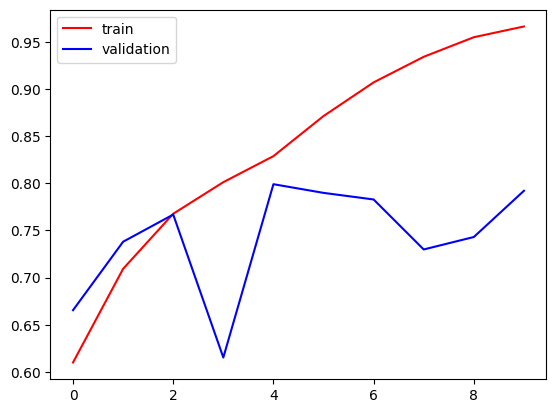

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

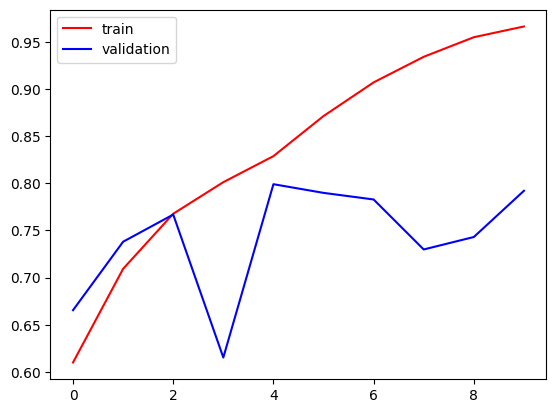

In [31]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

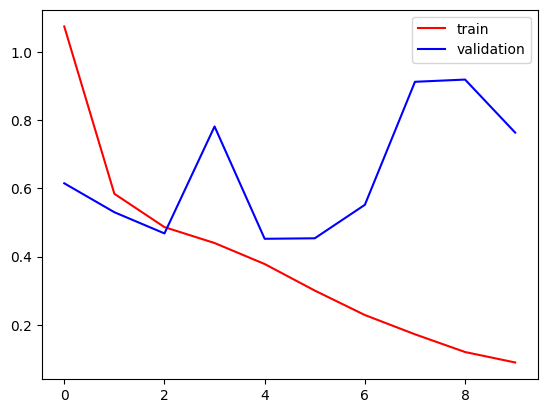

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

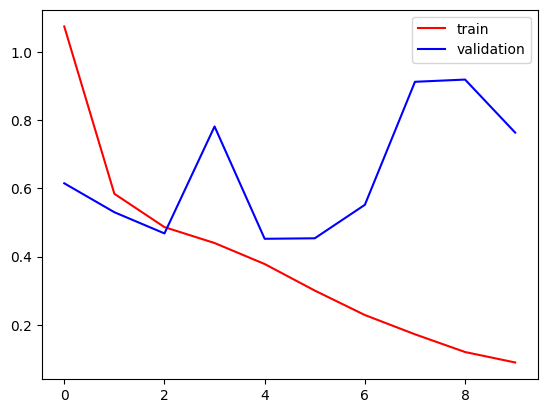

In [33]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [45]:
import cv2
import matplotlib.pyplot as plt

In [53]:
test_img = cv2.imread('/content/cat.jpeg')

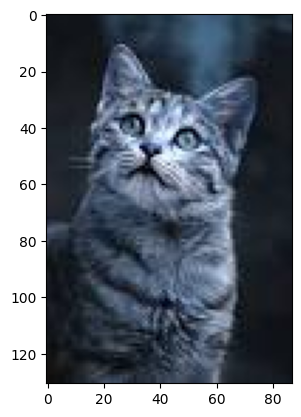

In [54]:
plt.imshow(test_img)

In [55]:
test_img.shape

(131, 87, 3)

In [56]:
test_img = cv2.resize(test_img,(256,256))

In [57]:
test_input = test_img.reshape((1,256,256,3))

In [58]:
model.predict(test_input)

1/1 [==============================] - 0s 280ms/step


array([[0.]], dtype=float32)